In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import ast
from __future__ import division

In [19]:
def get_average_headway(car_data, hl = 12, hs=4, L=4):
    lane1, lane2 = [], []
    for car in car_data:
        temp_data = {'isRobot': car['isRobot'], 'pos': car['pos']}
        if car['lane'] < -0.09:
#             lane1.append(temp_data)
            lane1.append((car['pos'], car['isRobot']))
        else:
#             lane2.append(temp_data)
            lane2.append((car['pos'], car['isRobot']))
            
    sorted_lane1, sorted_lane2 = sorted(lane1), sorted(lane2)
    total_headway_lane1, total_headway_lane2 = 0, 0
    for i in xrange(1, len(sorted_lane1)):
        if sorted_lane1[i - 1][1] and sorted_lane1[i][1]:
            total_headway_lane1 += hs
        else:
            total_headway_lane1 += hl
            
    for i in xrange(1, len(sorted_lane2)):
        if sorted_lane2[i-1][1] and sorted_lane2[i][1]:
            total_headway_lane2 += hs
        else:
            total_headway_lane1 += hl
            
    total_headway = total_headway_lane1 + total_headway_lane2
    total_cars = len(sorted_lane1) + len(sorted_lane2)
    return total_headway/total_cars

In [28]:
filename = "results.txt"
data01, data03, data05, data07, data09 = [], [], [], [], []
with open(filename, 'r') as f:
    for line in f:
        res_str = line
        dict1 = ast.literal_eval(res_str)
        if dict1['num_cars'] != 20:
            continue
        else:
            if dict1['prob_aut'] == 0.1:
                data01.append(get_average_headway(dict1['car_data']))
            elif dict1['prob_aut'] == 0.3:
                data03.append(get_average_headway(dict1['car_data']))
            elif dict1['prob_aut'] == 0.5:
                data05.append(get_average_headway(dict1['car_data']))
            elif dict1['prob_aut'] == 0.7:
                data07.append(get_average_headway(dict1['car_data']))
            if dict1['prob_aut'] == 0.9:
                data09.append(get_average_headway(dict1['car_data']))

mean01, mean03, mean05, mean07, mean09 = np.mean(data01), np.mean(data03), \
                                        np.mean(data05), np.mean(data07), np.mean(data09)

10.333333333333334

In [36]:
def capacity(alpha, n, hl = 12, hs = 4, L = 4, d=20):
    return n * d/(alpha**2 * hs  + (1 - alpha**2) * hl + L)

def capacity_UB(alpha, n, hl = 12, hs = 4, L = 4, d = 20):
    return n * d/(alpha * hs + (1 - alpha)* hl + L)

n, d = 2, 10
x_vals = np.linspace(0,1,100)
capacity_vals = [capacity(alpha, n, d=d) for alpha in x_vals]
capacity_UB_vals = [capacity_UB(alpha, n, d=d) for alpha in x_vals]

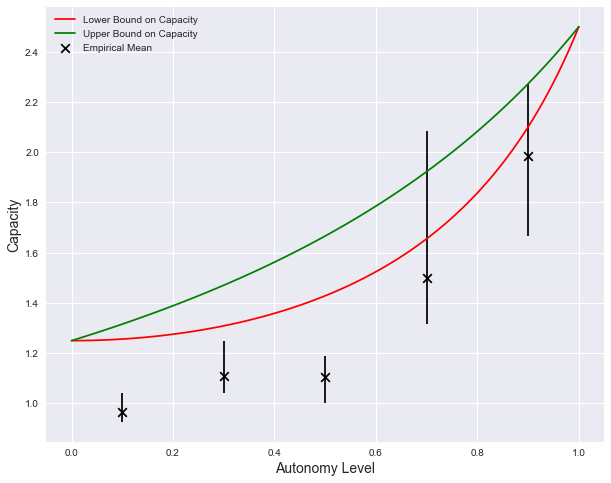

In [60]:
plt.figure(figsize=(10,8))
plt.plot(x_vals, capacity_vals, label="Lower Bound on Capacity", color='red')
plt.plot(x_vals, capacity_UB_vals, label="Upper Bound on Capacity", color='green')
plt.scatter([0.1,0.3,0.5,0.7,0.9], [d/mean01, d/mean03, d/mean05, d/mean07, d/mean09], marker='x', \
            label='Empirical Mean', color = 'black', s=75)

plt.vlines(x = 0.1, ymin = d/max(data01), ymax = d/min(data01))
plt.vlines(x = 0.3, ymin = d/max(data03), ymax = d/min(data03))
plt.vlines(x = 0.5, ymin = d/max(data05), ymax = d/min(data05))
plt.vlines(x = 0.7, ymin = d/max(data07), ymax = d/min(data07))
plt.vlines(x = 0.9, ymin = d/max(data09), ymax = d/min(data09))

plt.legend()
plt.xlabel("Autonomy Level", size=14)
plt.ylabel("Capacity", size=14)
plt.savefig("capacity_fig.pdf")

In [43]:
min(data09)

4.4

In [47]:
d/max(data01)

0.9259259259259258

In [48]:
d/min(data01)

1.0416666666666667